# Explanation Module (Quantitative-based XAI)

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import sys
if '/content/gdrive/My Drive/Colab Notebooks/ABELE_prostate/claudio/' not in sys.path:
  sys.path.append('/content/gdrive/My Drive/Colab Notebooks/ABELE_prostate/claudio/')

In [3]:
import pandas as pd
import numpy as np

In [4]:
path_csv = '/content/gdrive/My Drive/Colab Notebooks/ABELE_prostate/claudio/black_box/data/clinical_info/marksheet.csv'
df = pd.read_csv(path_csv)

In [6]:
for i in range(len(df)):
  if df.iloc[i].isnull()['psad'] and (not df.iloc[i].isnull()['prostate_volume']):
    df.iloc[i,5] = df.iloc[i,4]/df.iloc[i,6]

In [8]:
column = ['patient_age', 'psa', 'psad', 'prostate_volume', 'case_csPCa']

In [9]:
X = df[column]

In [31]:
df_normalized = (X - X.min()) / (X.max() - X.min())

df_normalized.head()

,patient_age,psa,psad,prostate_volume
0,0.614035,0.021885,0.015737,0.121711
1,0.842105,0.057615,0.032904,0.161184
2,0.473684,0.024565,0.025751,0.125000
3,0.473684,0.031264,0.017167,0.052632
4,0.508772,0.038410,0.017167,0.203947


In [32]:
X = df_normalized

<ipython-input-13-b130aebb5475>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(X, x='prostate_volume', y='case_csPCa', inner='box', palette='Dark2')


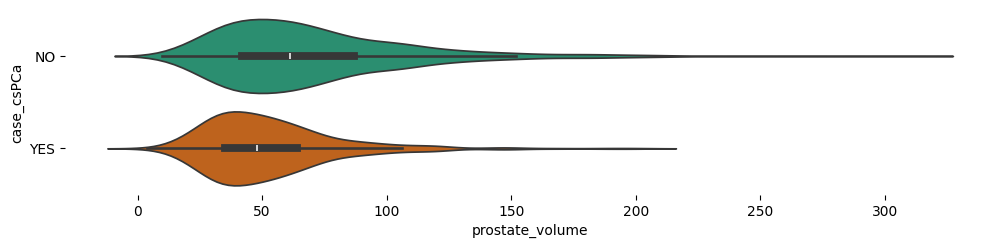

In [13]:
# @title case_csPCa vs prostate_volume

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(X['case_csPCa'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(X, x='prostate_volume', y='case_csPCa', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-12-56609b40a461>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(X, x='patient_age', y='case_csPCa', inner='box', palette='Dark2')


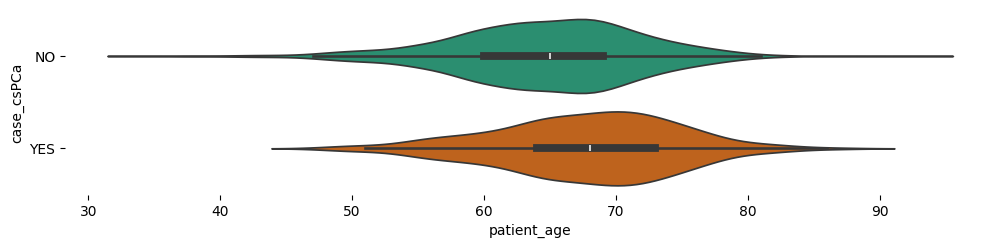

In [12]:
# @title case_csPCa vs patient_age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(X['case_csPCa'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(X, x='patient_age', y='case_csPCa', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [33]:
X.dropna(inplace=True)
len(X)

1416

In [ ]:
Y = X['case_csPCa']
Y.head()

In [14]:
mapping = {"NO": 0, "YES": 1}

# Apply the mapping to convert "No" to 0 and "Yes" to 1
Y = Y.map(mapping)
Y.head()

0    0
1    1
2    0
3    0
4    0
Name: case_csPCa, dtype: int64

In [36]:
column = ['patient_age', 'psa', 'psad', 'prostate_volume']
X = X[column]

## Unimodal Tabular Model Training

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [37]:
# 2. Split the dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [38]:


# 2. Split the dataset into training and test sets
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# 3. Build a 2-layer neural network
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # First hidden layer with 64 neurons and ReLU activation
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# 4. Train the neural network
model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# 5. Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

Epoch 1/50
29/29 [==============================] - 2s 15ms/step - loss: 0.6475 - accuracy: 0.6950 - val_loss: 0.6413 - val_accuracy: 0.6652
Epoch 2/50
29/29 [==============================] - 0s 5ms/step - loss: 0.5916 - accuracy: 0.7227 - val_loss: 0.6281 - val_accuracy: 0.6652
Epoch 3/50
29/29 [==============================] - 0s 6ms/step - loss: 0.5809 - accuracy: 0.7227 - val_loss: 0.6115 - val_accuracy: 0.6784
Epoch 4/50
29/29 [==============================] - 0s 5ms/step - loss: 0.5679 - accuracy: 0.7249 - val_loss: 0.5905 - val_accuracy: 0.6784
Epoch 5/50
29/29 [==============================] - 0s 5ms/step - loss: 0.5622 - accuracy: 0.7260 - val_loss: 0.5730 - val_accuracy: 0.6828
Epoch 6/50
29/29 [==============================] - 0s 5ms/step - loss: 0.5459 - accuracy: 0.7392 - val_loss: 0.5651 - val_accuracy: 0.6828
Epoch 7/50
29/29 [==============================] - 0s 5ms/step - loss: 0.5388 - accuracy: 0.7359 - val_loss: 0.5413 - val_accuracy: 0.7048
Epoch 8/50
29/29 [=

In [62]:
model.save('/content/gdrive/My Drive/Colab Notebooks/ABELE_prostate/claudio/tabular_model_scaled.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
from tensorflow.keras.models import load_model

model = load_model('/content/gdrive/My Drive/Colab Notebooks/ABELE_prostate/claudio/tabular_model_scaled.h5')

In [39]:
from sklearn.metrics import classification_report

# 1. Make predictions
predictions = model.predict(X_test)
# If your model outputs probabilities (as with sigmoid activation for binary classification), you need to convert these to class labels
predictions_labels = np.round(predictions).astype(int).flatten()

# 2. Generate the classification report
report = classification_report(Y_test, predictions_labels)

print(report)

9/9 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       203
           1       0.70      0.41      0.52        81

    accuracy                           0.78       284
   macro avg       0.75      0.67      0.69       284
weighted avg       0.77      0.78      0.76       284



In [ ]:
last_layer_weights, last_layer_biases = model.layers[-1].get_weights()

In [ ]:
last_layer_weights.shape, last_layer_biases.shape

((64, 1), (1,))

In [ ]:
# Save the weights array to a file
np.save('/content/gdrive/My Drive/Colab Notebooks/ABELE_prostate/claudio/last_layer_weights.npy', last_layer_weights)
# Save the biases array to a file
np.save('/content/gdrive/My Drive/Colab Notebooks/ABELE_prostate/claudio/last_layer_biases.npy', last_layer_biases)

## SHAP

In [24]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 9.0 MB/s eta 0:00:00


In [40]:
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


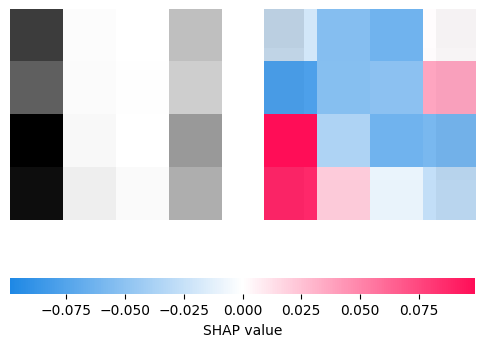

In [41]:
import shap
import numpy as np

# select a set of background examples to take an expectation over
background = X_train_np[np.random.choice(X_train_np.shape[0], 100, replace=False)]

# explain predictions of the model on four images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(X_test_np[1:5])

# plot the feature attributions
shap.image_plot(shap_values, -X_test_np[1:5])

In [52]:
import shap

# Assuming X_train_scaled is your scaled training data
background = X_train_np[np.random.choice(X_train_np.shape[0], 100, replace=False)]
explainer = shap.Explainer(model, background)

# If X_test_scaled is your test data and you wish to explain these instances
shap_values = explainer(X_test)

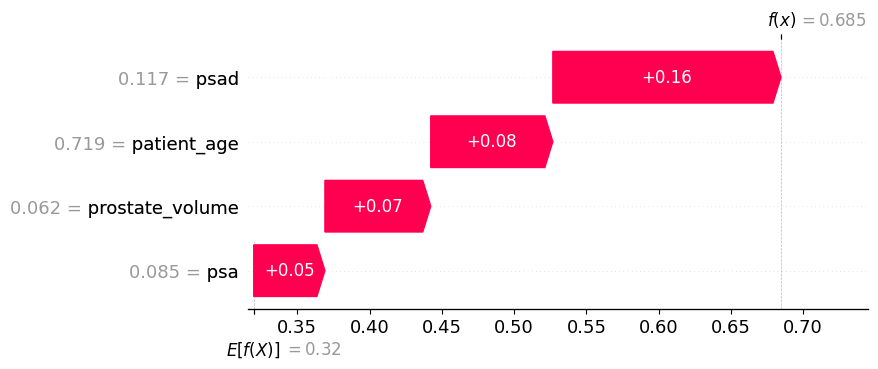

In [53]:
shap.plots.waterfall(shap_values[0])

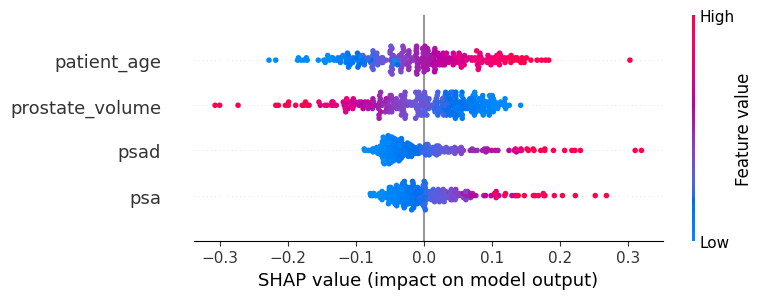

In [43]:
shap.summary_plot(shap_values, X_test)

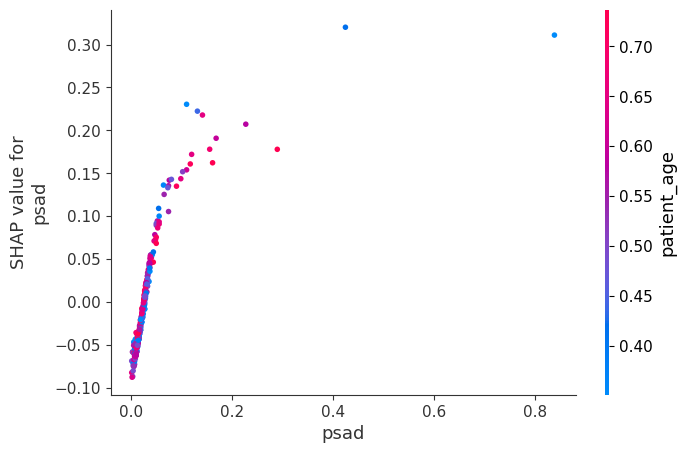

In [44]:
shap.dependence_plot('psad', shap_values.values, X_test)

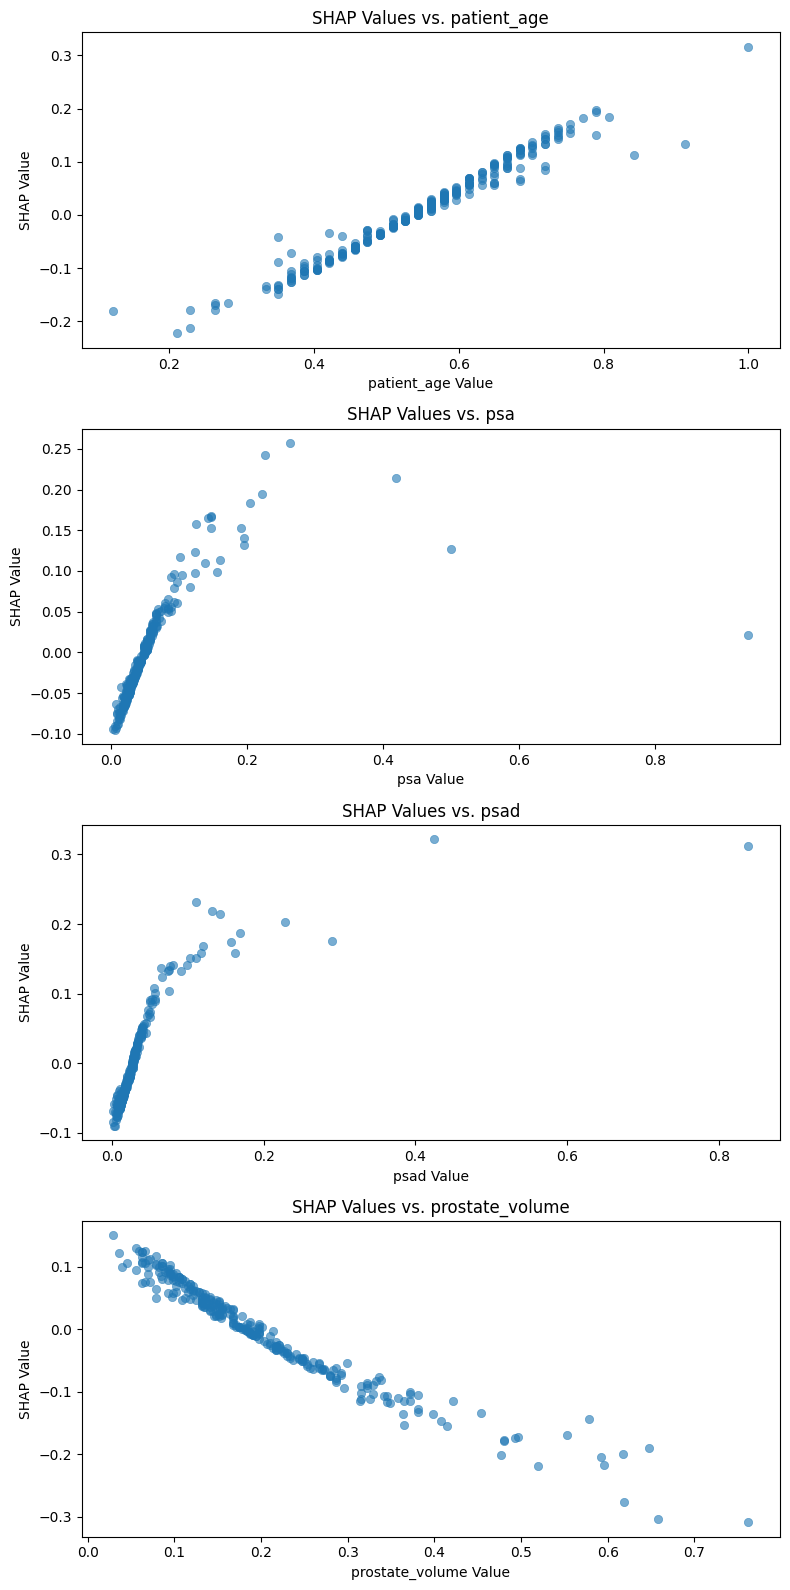

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_impact_distribution(X, shap_values, feature_names):
    fig, axs = plt.subplots(len(feature_names), 1, figsize=(8, 4 * len(feature_names)))

    for i, feature_name in enumerate(feature_names):
        # Extract the feature values and corresponding SHAP values
        feature_values = X[feature_name].values
        feature_shap_values = shap_values.values[:, i]

        # Create a DataFrame for easier plotting
        df = pd.DataFrame({feature_name: feature_values, 'SHAP Value': feature_shap_values})

        # Scatter plot for SHAP values vs feature values
        sns.scatterplot(data=df, x=feature_name, y='SHAP Value', ax=axs[i], alpha=0.6, edgecolor=None)
        axs[i].set_title(f'SHAP Values vs. {feature_name}')
        axs[i].set_xlabel(f'{feature_name} Value')
        axs[i].set_ylabel('SHAP Value')

    plt.tight_layout()
    plt.show()

# Assuming 'X_test' is your test data and 'shap_values' are the computed SHAP values
feature_names = X_test.columns  # Adjust based on your actual feature names
plot_feature_impact_distribution(X_test, shap_values, feature_names)

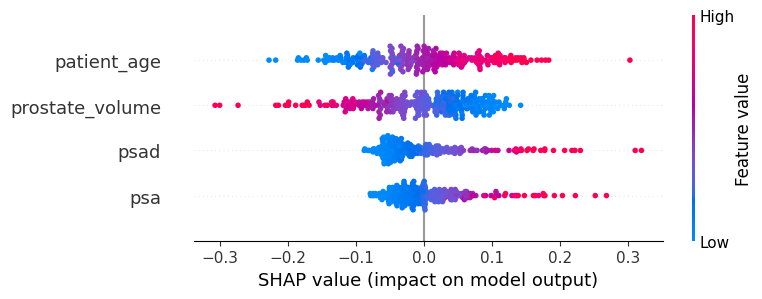

In [46]:
import shap

# Generate the bee swarm plot for all features
shap.summary_plot(shap_values, X_test, plot_type="dot")

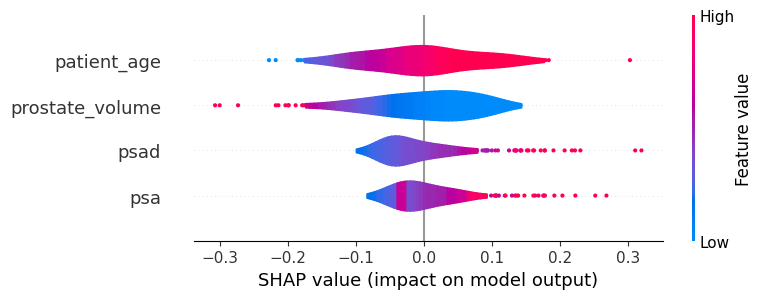

In [47]:
# Generate the violin plot for all features
shap.summary_plot(shap_values, X_test, plot_type="violin")

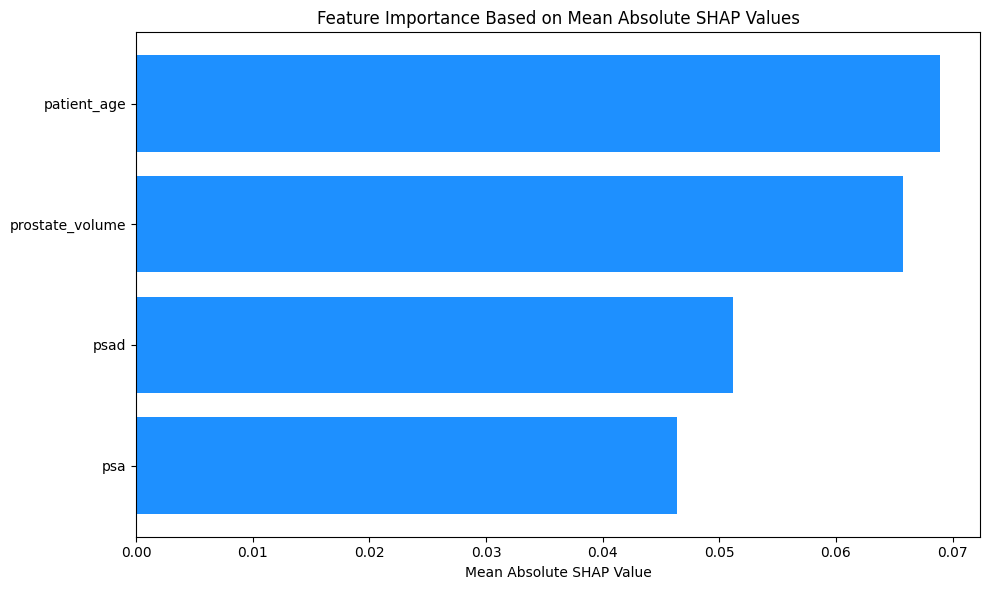

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the mean absolute SHAP values for each feature
mean_abs_shap = np.abs(shap_values.values).mean(axis=0)
# mean_abs_shap = shap_values.values.mean(axis=0)

# Sort the features by their mean absolute SHAP value
sorted_indices = np.argsort(mean_abs_shap)
sorted_features = X_test.columns[sorted_indices]
sorted_shap_values = mean_abs_shap[sorted_indices]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_features)), sorted_shap_values, color='dodgerblue')
plt.yticks(range(len(sorted_features)), sorted_features)
plt.xlabel('Mean Absolute SHAP Value')
plt.title('Feature Importance Based on Mean Absolute SHAP Values')
plt.tight_layout()
plt.show()

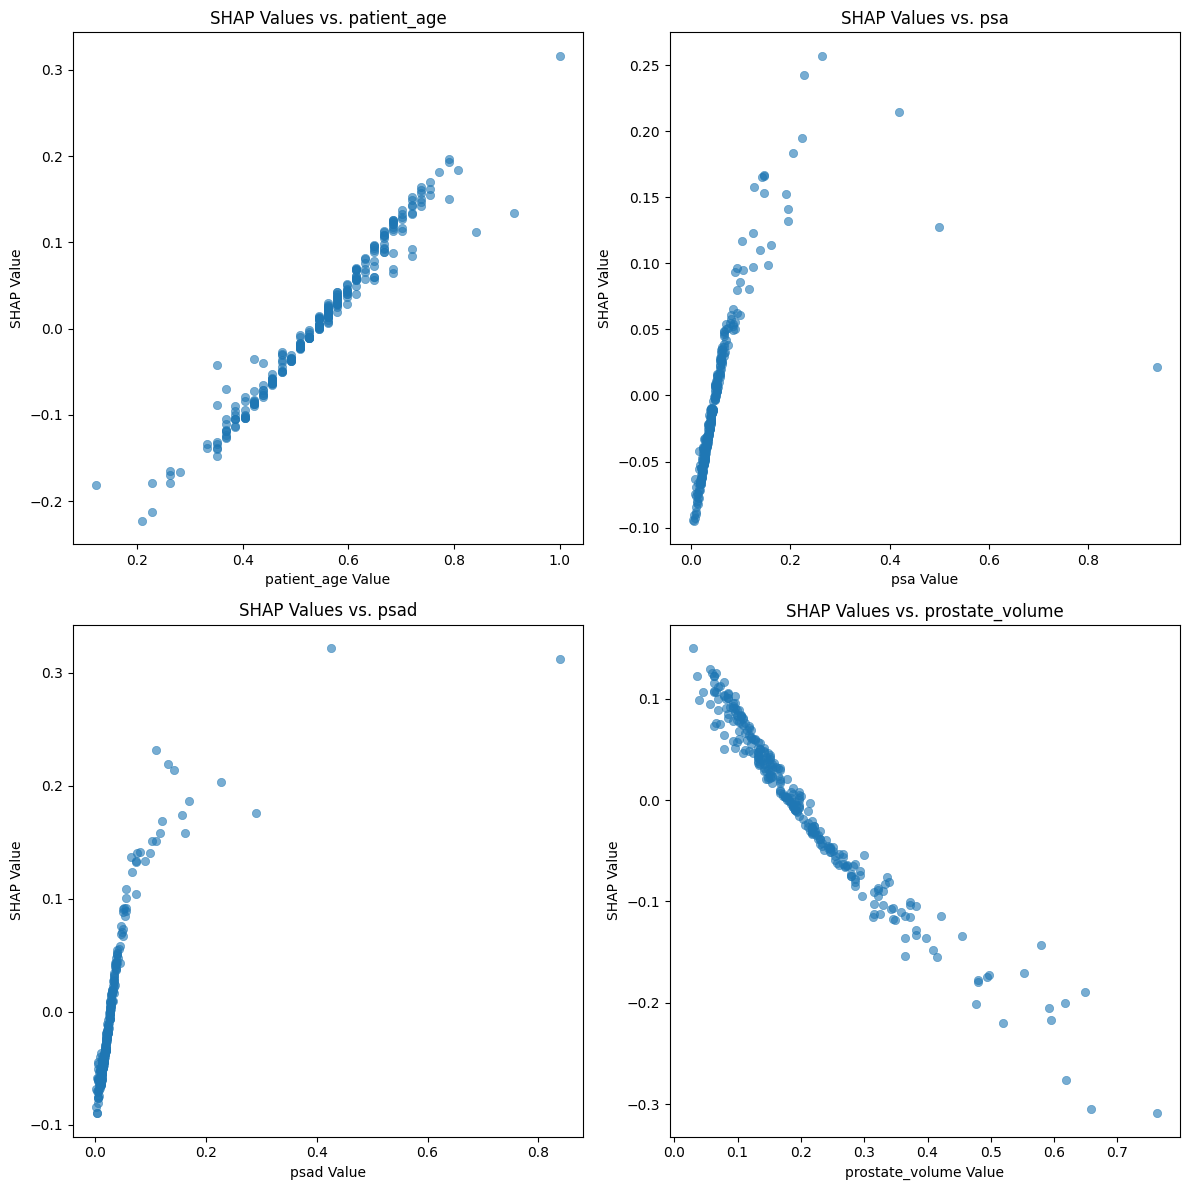

In [56]:
# Modifying the function to plot in a 2x2 grid
def plot_feature_impact_distribution_2x2(X, shap_values, feature_names):
    fig, axs = plt.subplots(2, 2, figsize=(12, 12))  # Adjust for a 2x2 subplot layout
    axs = axs.flatten()  # Flatten the array to easily iterate over it

    for i, feature_name in enumerate(feature_names):
        # Assuming feature_names has exactly 4 features as needed for a 2x2 grid
        if i >= 4:  # Safety check to avoid IndexError if more than 4 features are passed
            break

        # Extract the feature values and corresponding SHAP values
        feature_values = X[feature_name].values
        feature_shap_values = shap_values.values[:, i]

        # Create a DataFrame for easier plotting
        df = pd.DataFrame({feature_name: feature_values, 'SHAP Value': feature_shap_values})

        # Scatter plot for SHAP values vs feature values on the appropriate subplot
        sns.scatterplot(data=df, x=feature_name, y='SHAP Value', ax=axs[i], alpha=0.6, edgecolor=None)
        axs[i].set_title(f'SHAP Values vs. {feature_name}')
        axs[i].set_xlabel(f'{feature_name} Value')
        axs[i].set_ylabel('SHAP Value')

    plt.tight_layout()
    plt.show()

# Assuming 'X_test' is your test data and 'shap_values' are the computed SHAP values
# And assuming 'X_test' and 'shap_values' are already defined in your context
# feature_names should be adjusted to contain exactly 4 feature names for the 2x2 layout
plot_feature_impact_distribution_2x2(X_test, shap_values, feature_names[:4])

In [66]:
# Convert indices to boolean mask
positive_mask = Y_test == 1
negative_mask = Y_test == 0

# Convert SHAP values to numpy array if not already
# This step depends on the structure of your shap_values; adjust accordingly
shap_values_array = shap_values.values

# Apply boolean masks directly to numpy array of SHAP values
shap_values_pos_array = shap_values_array[positive_mask]
shap_values_neg_array = shap_values_array[negative_mask]

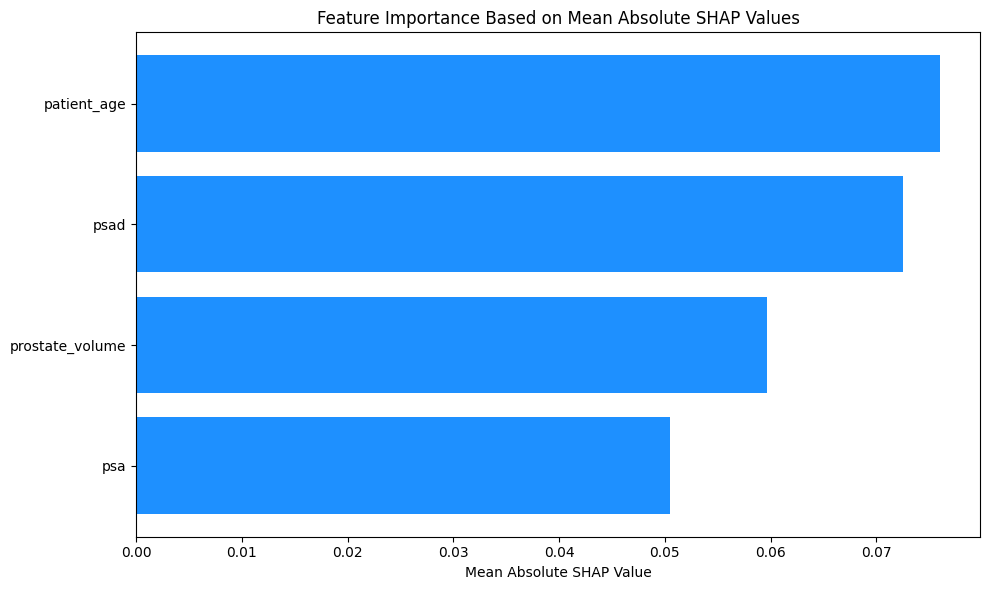

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the mean absolute SHAP values for each feature
mean_abs_shap = np.abs(shap_values_pos_array).mean(axis=0)
# mean_abs_shap = shap_values.values.mean(axis=0)

# Sort the features by their mean absolute SHAP value
sorted_indices = np.argsort(mean_abs_shap)
sorted_features = X_test.columns[sorted_indices]
sorted_shap_values = mean_abs_shap[sorted_indices]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_features)), sorted_shap_values, color='dodgerblue')
plt.yticks(range(len(sorted_features)), sorted_features)
plt.xlabel('Mean Absolute SHAP Value')
plt.title('Feature Importance Based on Mean Absolute SHAP Values')
plt.tight_layout()
plt.show()

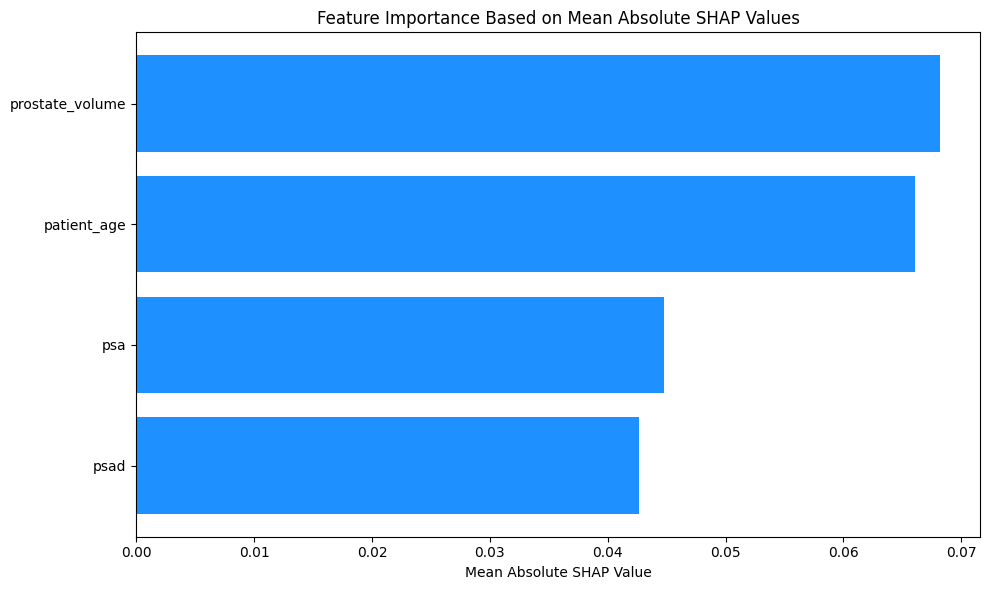

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the mean absolute SHAP values for each feature
mean_abs_shap = np.abs(shap_values_neg_array).mean(axis=0)
# mean_abs_shap = shap_values.values.mean(axis=0)

# Sort the features by their mean absolute SHAP value
sorted_indices = np.argsort(mean_abs_shap)
sorted_features = X_test.columns[sorted_indices]
sorted_shap_values = mean_abs_shap[sorted_indices]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_features)), sorted_shap_values, color='dodgerblue')
plt.yticks(range(len(sorted_features)), sorted_features)
plt.xlabel('Mean Absolute SHAP Value')
plt.title('Feature Importance Based on Mean Absolute SHAP Values')
plt.tight_layout()
plt.show()

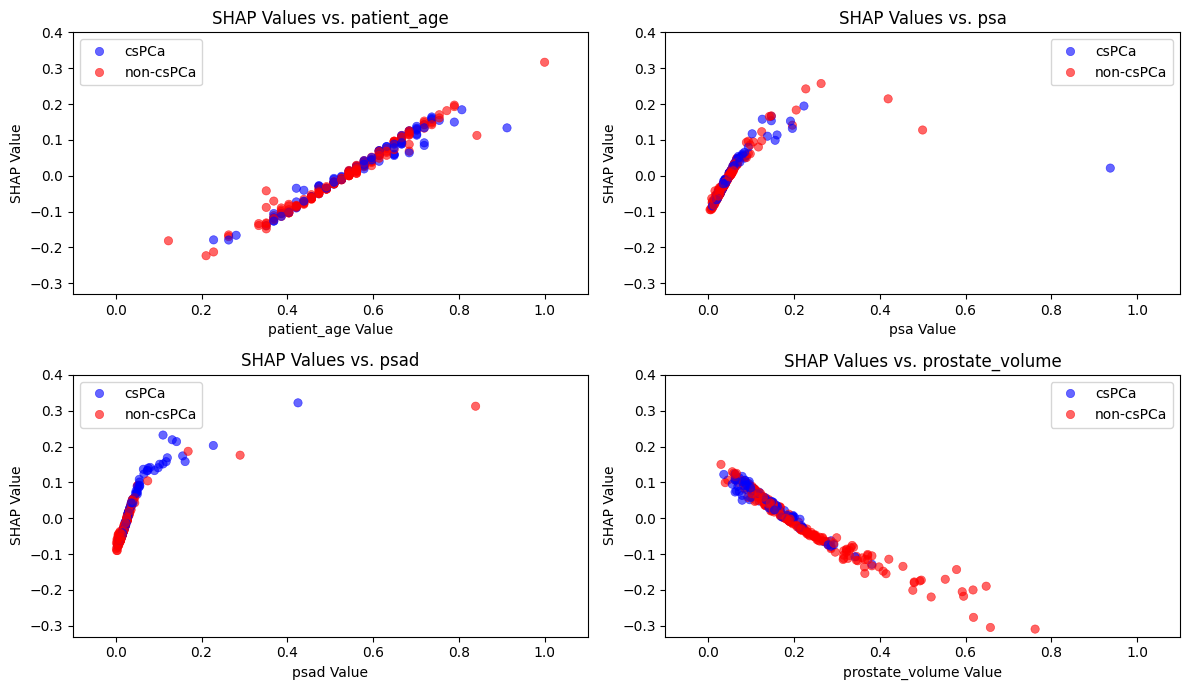

In [87]:
def plot_feature_impact_distribution_2x2_with_labels(X, shap_values, feature_names, numeric_labels):
    # Map numeric labels to categorical labels
    label_map = {0: 'non-csPCa', 1: 'csPCa'}
    categorical_labels = numeric_labels.map(label_map)

    fig, axs = plt.subplots(2, 2, figsize=(12, 7))  # Adjust for a 2x2 subplot layout
    axs = axs.flatten()  # Flatten the array to easily iterate over it

    for i, feature_name in enumerate(feature_names):
        if i >= 4:  # Safety check to avoid IndexError if more than 4 features are passed
            break

        # Extract the feature values and corresponding SHAP values
        feature_values = X[feature_name].values
        feature_shap_values = shap_values.values[:, i]

        # Create a DataFrame for plotting, including categorical labels for coloring
        df = pd.DataFrame({
            feature_name: feature_values,
            'SHAP Value': feature_shap_values,
            'Label': categorical_labels  # Use the mapped categorical labels
        })

        # Scatter plot for SHAP values vs feature values on the appropriate subplot
        scatter = sns.scatterplot(data=df, x=feature_name, y='SHAP Value', hue='Label', palette=['blue', 'red'], ax=axs[i], alpha=0.6, edgecolor=None)
        axs[i].set_title(f'SHAP Values vs. {feature_name}')
        axs[i].set_xlabel(f'{feature_name} Value')
        axs[i].set_ylabel('SHAP Value')

        # Uniform y-axis range across all subplots
        axs[i].set_ylim(-0.33, 0.4)
        axs[i].set_xlim(-0.1, 1.1)

        # Update legend to remove the title
        scatter.legend(title='')

    plt.tight_layout()
    plt.savefig('/content/gdrive/My Drive/Colab Notebooks/ABELE_prostate/claudio/shap_feature_impact.png', dpi=300, bbox_inches='tight')
    plt.show()

# Assuming 'X_test' is your test data, 'shap_values' are the computed SHAP values,
# and 'Y_test' contains the corresponding numeric labels (0s and 1s)
# feature_names should be adjusted to contain exactly 4 feature names for the 2x2 layout
plot_feature_impact_distribution_2x2_with_labels(X_test, shap_values, feature_names[:4], Y_test)


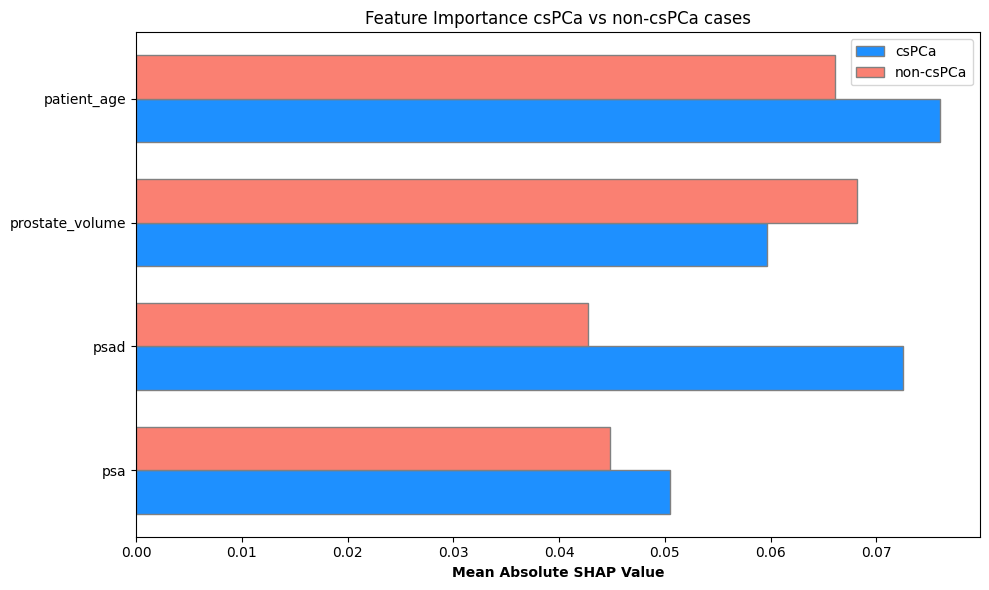

In [89]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming mean_abs_shap_pos and mean_abs_shap_neg are your computed mean absolute SHAP values
# for positive and negative classes respectively

# Calculate mean absolute SHAP values for positive and negative labels
mean_abs_shap_pos = np.abs(shap_values_pos_array).mean(axis=0)
mean_abs_shap_neg = np.abs(shap_values_neg_array).mean(axis=0)

# Ensure sorted_features is based on the combined importance from both sets
combined_mean_abs_shap = (mean_abs_shap_pos + mean_abs_shap_neg) / 2
sorted_indices_combined = np.argsort(combined_mean_abs_shap)

# Use sorted indices to order the SHAP values and feature names
sorted_features_combined = X_test.columns[sorted_indices_combined]
sorted_shap_values_pos = mean_abs_shap_pos[sorted_indices_combined]
sorted_shap_values_neg = mean_abs_shap_neg[sorted_indices_combined]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Set position of bar on X axis
bar_width = 0.35
r1 = np.arange(len(sorted_features_combined))
r2 = [x + bar_width for x in r1]

# Make the plot
ax.barh(r1, sorted_shap_values_pos, color='dodgerblue', height=bar_width, edgecolor='gray', label='csPCa')
ax.barh(r2, sorted_shap_values_neg, color='salmon', height=bar_width, edgecolor='gray', label='non-csPCa')

# Add xticks on the middle of the group bars
ax.set_xlabel('Mean Absolute SHAP Value', fontweight='bold')
ax.set_yticks([r + bar_width / 2 for r in range(len(sorted_features_combined))])
ax.set_yticklabels(sorted_features_combined)
ax.set_title('Feature Importance csPCa vs non-csPCa cases')

# Create legend & Show graphic
ax.legend()
plt.tight_layout()
plt.savefig('/content/gdrive/My Drive/Colab Notebooks/ABELE_prostate/claudio/shap_feature_bar.png', dpi=300, bbox_inches='tight')
plt.show()

In [40]:
shap.plots.force(shap_values[0])

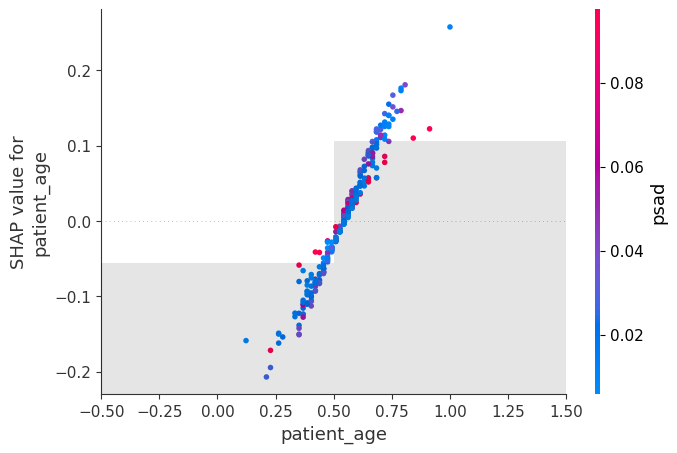

In [68]:
shap.plots.scatter(shap_values[:, 0], color=shap_values)

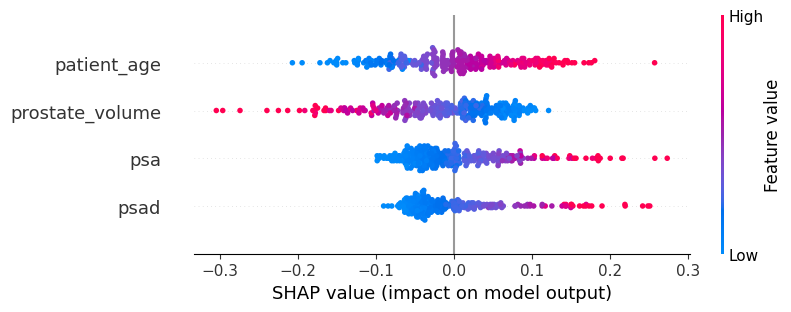

In [69]:
shap.plots.beeswarm(shap_values)

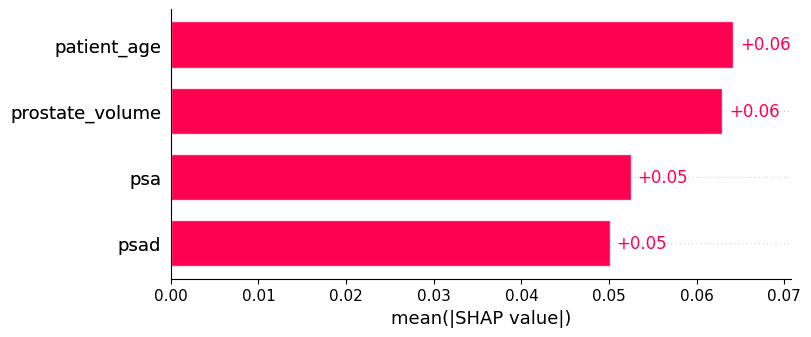

In [70]:
shap.plots.bar(shap_values)